## How to choose a major. University majors and career outcomes.

### This project will use data from the American Community Survey 2010-2012 Public Use Microdata Series (taken from the FiveThirtyEight github page). Using data on student's university major's and career outcomes, we will try to find the majors that most reliably lead to a lucrative career. 

In [19]:
#First we will import and explore the dataset.
import pandas as pd
import requests
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/all-ages.csv'
res = requests.get(url, allow_redirects=True)
with open('all-ages.csv','wb') as file:
    file.write(res.content)
major_data = pd.read_csv('all-ages.csv')



In [20]:
major_data.head(10)


,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0
5,1105,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,51077,2070,0.031791,50000,35000,75000.0
6,1106,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,4042,264,0.050867,63000,39400,88000.0
7,1199,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,5074,261,0.039230,52000,35000,75000.0
8,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.051290,52000,38000,75000.0
9,1302,FORESTRY,Agriculture & Natural Resources,69447,48228,39613,2144,0.042563,58000,40500,80000.0


In [21]:
major_data.isnull().sum()

Major_code                       0
Major                            0
Major_category                   0
Total                            0
Employed                         0
Employed_full_time_year_round    0
Unemployed                       0
Unemployment_rate                0
Median                           0
P25th                            0
P75th                            0
dtype: int64

In [22]:
major_data.shape

(173, 11)

In [23]:
major_data.dtypes

Major_code                         int64
Major                             object
Major_category                    object
Total                              int64
Employed                           int64
Employed_full_time_year_round      int64
Unemployed                         int64
Unemployment_rate                float64
Median                             int64
P25th                              int64
P75th                            float64
dtype: object

The data is already clean, with no null values in the dataset and column names that are easy to understand (see readme. file). The numerical data is all stored as int or float values meaning mathematical functions can be applied to them. Therefore we can immediately begin analysis of the data.

In [24]:
# Find top 10 majors by median salary
median_salary = major_data[['Major', 'Median']].sort_values('Median', ascending=False)
median_salary.head(10)

,Major,Median
59,PETROLEUM ENGINEERING,125000
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,106000
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,97000
55,METALLURGICAL ENGINEERING,96000
58,NUCLEAR ENGINEERING,95000
56,MINING AND MINERAL ENGINEERING,92000
97,MATHEMATICS AND COMPUTER SCIENCE,92000
48,ELECTRICAL ENGINEERING,88000
45,CHEMICAL ENGINEERING,86000
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,85000


In [37]:
# Find unemployment rates of the highest paying majors
unemployment_top_majors = major_data[major_data['Major'].isin(median_salary['Major'][:10])]
print(unemployment_top_majors[['Major', 'Unemployment_rate']].sort_values('Unemployment_rate'))
                                     

                                                 Major  Unemployment_rate
51              GEOLOGICAL AND GEOPHYSICAL ENGINEERING           0.000000
97                    MATHEMATICS AND COMPUTER SCIENCE           0.024900
154  PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...           0.034358
57           NAVAL ARCHITECTURE AND MARINE ENGINEERING           0.040309
59                               PETROLEUM ENGINEERING           0.042205
55                           METALLURGICAL ENGINEERING           0.044873
45                                CHEMICAL ENGINEERING           0.046261
56                      MINING AND MINERAL ENGINEERING           0.047032
48                              ELECTRICAL ENGINEERING           0.050509
58                                 NUCLEAR ENGINEERING           0.067159


Text(0, 0.5, 'Unemployment rate (%)')

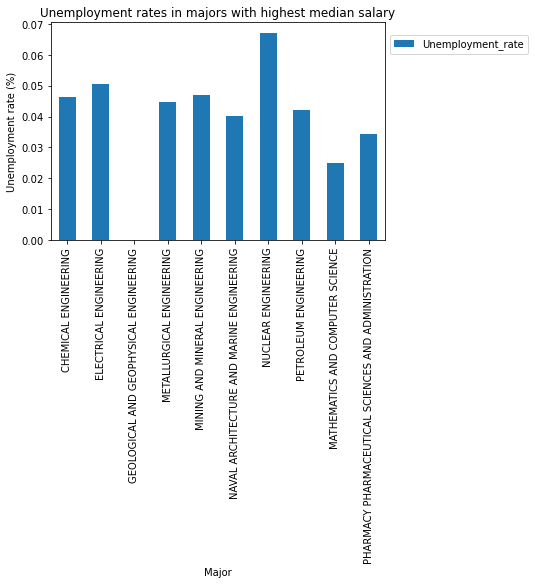

In [38]:
ax = unemployment_top_majors.plot(x='Major', y='Unemployment_rate', kind='bar', title='Unemployment rates in majors with highest median salary')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.9))
ax.set_ylabel('Unemployment rate (%)')

The unemployment rates of the top paying majors are somewhat variable, but all fairly low, suggesting they are all roughly similar in their prospects for a lucrative career. However, the unemployment rate only tells us what percentage of graduates are not employed, and does not say what percentage are employed in high-skilled jobs. For example, the low unemployment rate of mathematics and computer science grads may reflect high demand in that sector, or rather may reflect demographic factors of those particular graduates, for example they may be over-represented in low socio-economic demographics which may have a higher propensity to accept any job, whether high-skilled or not. To further understand which majors offer the safest bet of a high-paying, high skilled job, we need to examine the employment data in more granular detail. To do this, we need to import more data.

In [26]:
#Import new dataset from FiveThirtyEight GitHub page
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv'
res = requests.get(url, allow_redirects=True)
with open('recent-grads.csv','wb') as file:
    file.write(res.content)
detailed_employment = pd.read_csv('recent-grads.csv')

In [27]:
detailed_employment.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [28]:
major_data.sort_values('Median', ascending=False).head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
59,2419,PETROLEUM ENGINEERING,Engineering,19631,14002,11636,617,0.042205,125000,75000,210000.0
154,6108,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,180084,124058,89234,4414,0.034358,106000,78000,125000.0
57,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,16094,10690,9226,449,0.040309,97000,60000,125000.0
55,2415,METALLURGICAL ENGINEERING,Engineering,12818,6939,5462,326,0.044873,96000,65000,123000.0
58,2418,NUCLEAR ENGINEERING,Engineering,9826,7320,6474,527,0.067159,95000,65000,128000.0


Comparing the two datasets (our original dataset and the newly imported data), we see that while the newly imported data has a more detailed breakdown of employment data per major, it's sample sizes are smaller. Therefore we cannot use the absolute figures of students employed in high skilled jobs and compare it to the absolute figures from the orignal data. Instead, we can convert the figures in the new data into percentages before comparing it to our original data.

In [29]:
detailed_employment.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

In [41]:
#Convert columns of interest into percentages
detailed_employment['Share_employed_skilled'] = (detailed_employment['College_jobs']/detailed_employment['Employed'])*100
detailed_employment['Share_employed_unskilled'] = (detailed_employment['Non_college_jobs']/detailed_employment['Employed'])*100
detailed_employment['Share_employed_low_wage'] = (detailed_employment['Low_wage_jobs']/detailed_employment['Employed'])*100
detailed_employment['Unemployment_rate'] = detailed_employment['Unemployment_rate']*100

First we need to take the data that we need from this dataset, then we can join it to the data we have already. Both datasets contain the column 'Major_code', we can use this column to join the datasets into one dataframe.

In [42]:
# Join two datasets on 'Major_code' column
data_to_join = detailed_employment[['Major_code', 'Share_employed_skilled', 'Share_employed_unskilled', 'Share_employed_low_wage']]
updated_major_data = pd.merge(left=major_data, right=data_to_join, on='Major_code')
updated_major_data.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Share_employed_skilled,Share_employed_unskilled,Share_employed_low_wage
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0,27.217470,53.095452,9.443944
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0,15.621196,50.482837,11.052503
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0,24.609016,41.076357,4.323827
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0,31.808088,55.931510,12.418186
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0,37.567482,40.457288,15.401715


Now we can look at the employment data of the top ten highest earning majors in more detail.

In [43]:
employment_breakdown = updated_major_data[updated_major_data['Major'].isin(median_salary['Major'][:10])]
#Convert unemployment rate to percentage for data presentation

employment_breakdown[['Major', 'Median', 'Unemployment_rate', 'Share_employed_skilled', 'Share_employed_unskilled', 'Share_employed_low_wage']].sort_values('Median', ascending=False).head(10)

,Major,Median,Unemployment_rate,Share_employed_skilled,Share_employed_unskilled,Share_employed_low_wage
59,PETROLEUM ENGINEERING,125000,0.042205,77.631579,18.421053,9.767206
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,106000,0.034358,69.632972,27.033694,6.744886
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,97000,0.040309,69.788918,13.456464,0.000000
55,METALLURGICAL ENGINEERING,96000,0.044873,70.370370,27.160494,0.000000
58,NUCLEAR ENGINEERING,95000,0.067159,61.497038,35.379645,13.139472
56,MINING AND MINERAL ENGINEERING,92000,0.047032,54.687500,40.156250,7.812500
97,MATHEMATICS AND COMPUTER SCIENCE,92000,0.024900,80.858676,11.985689,4.472272
48,ELECTRICAL ENGINEERING,88000,0.050509,74.003682,17.559101,5.118848
45,CHEMICAL ENGINEERING,86000,0.046261,71.277341,17.280299,3.782984
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,85000,0.000000,82.947020,8.278146,8.112583


Text(0, 0.5, 'Share of graduates in skilled employment (%)')

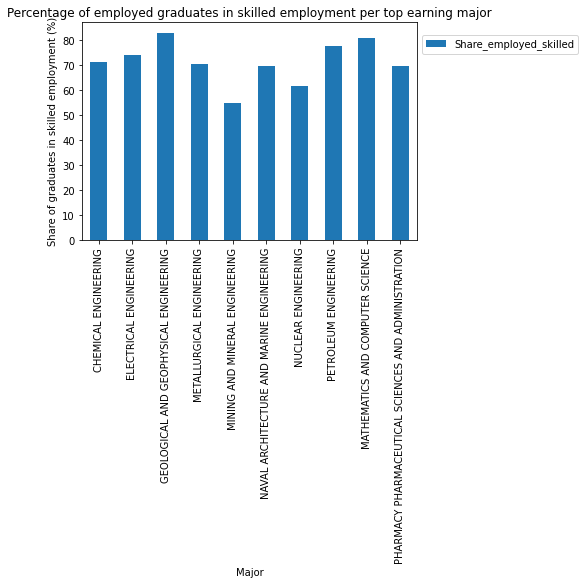

In [44]:
ax = employment_breakdown.plot(x='Major', y='Share_employed_skilled', kind='bar', title='Percentage of employed graduates in skilled employment per top earning major')
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.9))
ax.set_ylabel('Share of graduates in skilled employment (%)')


In the top earning university majors there is a wide variability in the percentage of graduates in skilled employment. This is a good factor to consider when picking a university major. Majors such as Mathematics and Computer Science and Geological and Geophysical Engineering have very high rates of skilled employment. We can compare rates of skilled employment to median salary to get a valuable survey of the safest majors for a lucrative career.

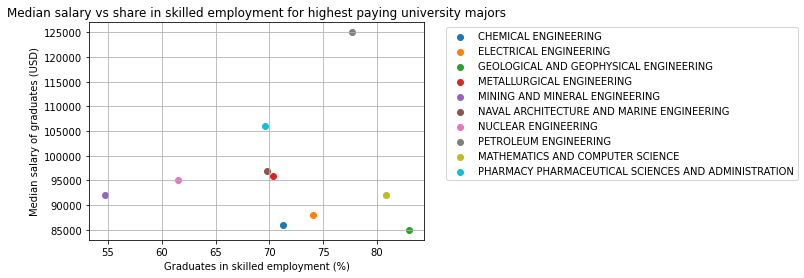

In [46]:
# Graph each top paying major by median salary and rate of skilled employment

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
x = list(employment_breakdown['Share_employed_skilled'])
y = list(employment_breakdown['Median'])
l = list(employment_breakdown['Major'])

colours = plt.get_cmap('tab10', 10)

fig, ax = plt.subplots()


for i in range(10):
    plt.scatter(x[i], y[i], label=l[i], color=colours(i))

ax.set_title('Median salary vs share in skilled employment for highest paying university majors')
ax.set_xlabel('Graduates in skilled employment (%)')
ax.set_ylabel('Median salary of graduates (USD)')
    
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)
plt.show()
    

In the above graph we see that Petroleum Engineering stands out as the most promising major when taking into consideration both median salary and rate of skilled employment, while Mining and Mineral Engineering is the least promising of the highest paying majors, due to its low rate of skilled employment and relatively lower salary. Other majors offer a tradeoff between salary and likelihood of finding skilled employment, for example Mathematics and Computer Science and Geological and Geophysical Engineering have the highest rates of skilled employment among graduates, but offer relatively lower salaries than the other high paying majors.

In conclusion, if picking a major purely on the basis of acheiving a lucrative career, Petroleum Engineering is the clear standout.